In [2]:
import numpy as np
import pandas as pd
import random as rnd
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import linear_model
from scipy.stats import *
from sklearn import preprocessing 
import matplotlib.pyplot as plt 
%matplotlib inline 
import random as rnd

In [3]:
df=pd.read_csv('regLinPoli2.csv')
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X30,X31,X32,X33,X34,X35,X36,X37,X38,y
0,153.782162,23648.953370,2.186906,0.155247,16,-153.782162,-23648.95337,-2.186906,-0.155247,-909.534012,...,272,-1856,1390,-4293,4171,-3493,-290,-1017,9,2.033960e+15
1,645.991251,417304.697100,2.810227,-0.923396,35,-153.782162,-23648.95337,-2.810227,0.923396,343.752475,...,-265,-3587,-2479,-1284,-2127,2369,2657,-1481,-150,4.694470e+19
2,-412.060457,169793.820200,2.614961,0.489764,-25,-153.782162,-23648.95337,-2.614961,-0.489764,-776.331121,...,9,4104,-4634,-1637,-4228,527,-1773,-1676,67,-2.017100e+18
3,35.884351,1287.686648,1.554905,-0.970388,-75,-153.782162,-23648.95337,-1.554905,0.970388,696.736200,...,-215,749,-3645,-3202,-1173,-3248,1888,1295,-49,7.629161e+10
4,-85.073496,7237.499779,1.929794,0.247883,44,-153.782162,-23648.95337,-1.929794,-0.247883,-527.805076,...,-360,2150,507,-1972,-7497,-2427,4368,670,43,-3.225260e+13


**Partimos el dataframe en arrays**

In [4]:
X=np.array(df.iloc[:,0:38]) 
y=np.array(df.iloc[:,38])

In [5]:
len(df)

1029

**Hacemos la función que particiona los índices del dataframe en k particiones**

In [6]:
def particion(base,X,k):
    selec=[]
    n=(np.floor(np.round(len(X)/k))).astype(int)
    w=list(base.index.values)
    for i in range(k):
        if len(w)>=n:
            samp=list((rnd.sample(w,n)))
            selec=selec+[samp]
            w=[x for x in w if x not in samp]
        else:
            samp=list((rnd.sample(w,len(w))))
            selec=selec+[samp]
    return(selec)

**Función que selecciona la partición con la que se va a validar y entrenar**

In [7]:
def crossval(X,a,sel):
    train=[x for x in a if x not in sel]
    valid=[x for x in a if x in sel]
    return train,valid

**función de regularización**

In [8]:
def salida(w0,w,X):
    suma = w0
    for i in range(len(w)):
        suma = suma + w[i]*X[i]
    return suma

In [9]:
def regularizado(w,x,y,lam,eta):

    for i in range(len(x)):

        sal = salida(w[0],w[1:len(w)],x[i])
        #Calculo el error de prediccion        
        error =y[i] - sal
        # Obtengo el error w0
        w[0] = w[0] + eta*error
        
    
        for j in range(len(x.T)):
            w[j+1] = w[j+1] + eta*error*x[i,j] - lam*w[j+1]
        
    return w

**Función cross-validation**

In [10]:
def cross_reg(a,X,k):
    errprom=np.array([]) 
    lamb=np.arange(-0.002,.015,0.001)
    for i in lamb:
        errmin=[]
        selec=particion(a,X,k)
        for j in range(len(selec)):
            train,test=crossval(X,list(a.index.values),selec[j])
            X_train=X[train]
            y_train=y[train]
            X_test=X[test]
            y_test=y[test]
        
            scalerx = preprocessing.StandardScaler().fit(X_train)
            X_train=scalerx.transform(X_train)
            X_test=scalerx.transform(X_test)
        
            m=np.mean(y_train)
            sd=np.std(y_train)
            y_train=(y_train-m)/sd
            y_test=(y_test-m)/sd
        
            w=[rnd.random() for i in range(X_train.shape[1]+1)]
        
            w=regularizado(w,X_train,y_train,i,0.01)
            errt=np.mean((y_train - (w[0]+ np.dot(X_train,w[1:len(w)])))**2)
            errmin=errmin+[errt]
        errprom=np.append(errprom,np.mean(np.array(errmin)))
        minlam=lamb[np.where(abs(np.array(errprom))==min(abs(np.array(errprom))))]
        
    return(errprom,lamb,minlam)     

la mejor lambda es: [ 0.001]


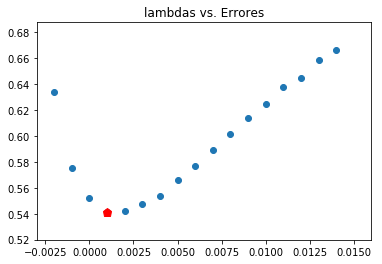

In [23]:
errprom,lamb,minlam=cross_reg(df,X,10) 
plt.xlim(-.003, .016)
plt.scatter(lamb,errprom)
plt.plot(minlam,min(abs(np.array(errprom))),'p-',color='red',ms=9)
plt.title('lambdas vs. Errores')
print('la mejor lambda es:',minlam)

In [18]:
#lmb=np.array([])
a=df
k=10
errprom=np.array([]) 
lamb=np.arange(-0.002,.015,0.001)
for i in lamb:
    errmin=[]
    selec=particion(a,X,k)
    for j in range(len(selec)):
        train,test=crossval(X,list(a.index.values),selec[j])
        X_train=X[train]
        y_train=y[train]
        X_test=X[test]
        y_test=y[test]
        
        scalerx = preprocessing.StandardScaler().fit(X_train)
        X_train=scalerx.transform(X_train)
        X_test=scalerx.transform(X_test)
        
        m=np.mean(y_train)
        sd=np.std(y_train)
        y_train=(y_train-m)/sd
        y_test=(y_test-m)/sd
        
        w=[rnd.random() for i in range(X_train.shape[1]+1)]
        
        w=regularizado(w,X_train,y_train,i,0.01)
        errt=np.mean((y_train - (w[0]+ np.dot(X_train,w[1:len(w)])))**2)
        errmin=errmin+[errt]
    errprom=np.append(errprom,np.mean(np.array(errmin)))
    minlam=lamb[np.where(abs(np.array(errprom))==min(abs(np.array(errprom))))]
    

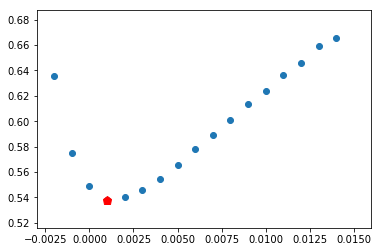

In [19]:
plt.xlim(-.003, .016)
plt.scatter(lamb,errprom)
plt.plot(minlam,min(abs(np.array(errprom))),'p-',color='red',ms=9)

In [20]:
errprom

array([ 0.63531686,  0.57460143,  0.5490911 ,  0.53756927,  0.54033709,
        0.54607811,  0.55413888,  0.56573925,  0.57807853,  0.58945014,
        0.60058203,  0.6136526 ,  0.62407195,  0.63598859,  0.64620612,
        0.65907817,  0.66573006])

In [21]:
 minlam

array([ 0.001])